## Load in Serialized values

In [1]:
import pickle 
import pandas as pd
import json

inp_data = pd.read_csv('serialize/inp_data.csv')

with open('serialize/x.pickle', 'rb') as out:
    x = pickle.load(out)

with open('serialize/x_2g.pickle', 'rb') as out:
    x_2g = pickle.load( out)

with open('serialize/normalized_x.pickle', 'rb') as out:
    normalized_x = pickle.load(out)

with open('serialize/normalized_x2g.pickle', 'rb') as out:
    normalized_x2g = pickle.load(out)

with open('serialize/vocabulary.json', 'r') as out:
    cv_vocabulary_ = json.load(out)
    
with open('serialize/vocabulary_2g.json', 'r') as out:
    cv_2grams_vocabulary_ = json.load(out)

## ML MODEL

In [4]:
import sklearn

In [5]:
vocab_1g = [p[0] for p in sorted(cv_vocabulary_.items(), key=lambda p: p[1])]

In [8]:
from sklearn.model_selection import GridSearchCV

help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either e

In [10]:
from copy import deepcopy
import numpy as np

ignore_terms = [
    'mountain',
    'nov',
    'res',
    'november',
#     'november december',
    'movement',
    'multi',
    'municipality achieve',
    'coal',
    'delegate',
    'fifth', 
    'multifunctional',
    'amp',
    'amp amp',
    'della',
        'delle',
    'sep',
    'separate',
    'word',
    'work',
    'body',
    'ime',
    'ibe',
    'eae'

]
def remove_terms(vocab, ignore_terms, x, x_counts):
    last_idx = 0
    pairs = []
    for t in sorted(ignore_terms):
        idx = vocab[t]
        pairs.append((last_idx, idx))
        last_idx = idx+1
    pairs.append((last_idx, x.shape[1]))
    slices = [x[:,last_idx:idx].toarray() for last_idx, idx, in pairs]
    catted = np.concatenate(slices, axis=1)
    kws = [t for t, idx in sorted(vocab.items(), key=lambda p: p[1]) 
           if t not in ignore_terms]
    slicescounts = [x_counts[:,last_idx:idx].toarray() for last_idx, idx, in pairs]
    catted_counts = np.concatenate(slicescounts, axis=1)
    return catted, kws, catted_counts
X_inp, kwds, X_inpcounts = remove_terms(cv_2grams_vocabulary_, ignore_terms, normalized_x2g, x_2g)
print(X_inp.shape, len(kwds), X_inpcounts.shape)

(317, 8070) 8070 (317, 8070)


In [11]:
from scipy import stats

rvs1 = stats.norm.rvs(loc=5,scale=10,size=200)
rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)
stats.ttest_ind(rvs1,rvs2).pvalue

0.42202837500866697

In [12]:
w, wo = X_inpcounts[inp_data['econ_wide_net_zero']], X_inpcounts[~inp_data['econ_wide_net_zero']]

In [13]:
import numpy as np
import pandas as pd

# some random data frames
df1 = pd.DataFrame(dict(x=np.random.randn(100), y=np.random.randint(0, 5, 100)))
df2 = pd.DataFrame(dict(x=np.random.randn(100), y=np.random.randint(0, 5, 100)))

# concatenate them
df_concat = pd.concat((df1, df2))
# x   -0.163044
# y    2.120000
# dtype: float64

by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()

print(df_means)
#           x    y

           x    y
0   0.108463  1.0
1   0.922512  0.5
2  -0.619680  2.5
3  -0.401586  0.5
4   0.663663  3.0
..       ...  ...
95  0.485474  1.5
96  0.104909  3.5
97  0.094523  1.5
98 -1.011127  4.0
99  0.142735  4.0

[100 rows x 2 columns]


,Target
precision,0.977169
recall,0.887967
f1-score,0.930435
support,241.000000


/Users/siddharthsachdeva/personal/carbon_zero_nlp/czero_nlp/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


C
5.444444444444445


/Users/siddharthsachdeva/personal/carbon_zero_nlp/czero_nlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/siddharthsachdeva/personal/carbon_zero_nlp/czero_nlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/siddharthsachdeva/personal/carbon_zero_nlp/czero_nlp/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

,Target
f1-score,0.812863
precision,0.840619
recall,0.811000


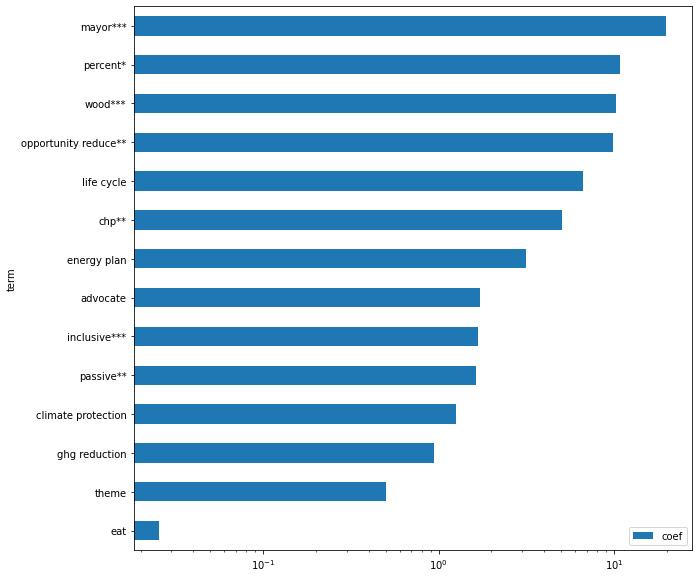

In [25]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from IPython.display import display, HTML
from sklearn.feature_selection import chi2
from scipy import stats
import os
import matplotlib.pyplot as plt

def visualize_feat_scores(term_data):
    fig, ax = plt.subplots(figsize=(10, 10))
    term_data.plot.barh(y='coef', ax=ax, logx=True)

def clf_results(Y_true, Y_pred):
    results = pd.DataFrame(classification_report(Y_true, Y_pred, output_dict=True))
    results = results.rename({'False': 'No Target', 'True': 'Target'}, axis='columns')
    return results
    
def construct_concordance_html(term_data, out_file='significant_term_examples.html'):
    lemattized_text = inp_data['lemmatized_text']
    term_examples = []
    for i, (t, p, coef) in enumerate(zip(term_data.index, term_data['pval'], term_data['coef'])):
        term = t.replace('*', '')
        contains = lemattized_text.str.contains(term)
        relevant_lemattized_text = lemattized_text[contains]
        tok_offsets = relevant_lemattized_text.apply(lambda text: len(text[:text.index(term)].split(' ')))
        tok_offsets = tok_offsets.rename('term_offset')
        relevant = pd.concat([inp_data[contains], tok_offsets], axis=1)
        containing_sent = relevant.apply(lambda row:
            row['tokens'][row['term_offset']].sent.text, axis=1)
        containing_sent = containing_sent.str.replace('\n', ' ')
        for t in term.split(' '):
            bolded =  '<b>'+t+'</b>'
            containing_sent = containing_sent[containing_sent.str.lower().str.contains(t)].str.lower().str.replace(t, bolded)
        ax.annotate('P-value:{}'.format(p), (coef+0.1, i))
        term_examples.append((term , '<br><br>'.join(containing_sent.tolist())))
    out = pd.DataFrame(term_examples, columns=['term', 'examples']).iloc[::-1]#.set_index('term')
    ax.set_title('Ambitious Net Zero Plan Significant Terms')
    ax.set_xlabel('log(coeffiencent)')
    with open(out_file, 'w') as f:
        f.write(out.set_index('term').to_html(escape=False))
        
def fit_logcv(x, kws, x_counts, Y,  Cs =  np.linspace(1, 6, 10), out_file=None):
    # Fit a logistic regression model over many folds to find optimal C param
    logit = LogisticRegressionCV(penalty='l1', solver='liblinear', max_iter=10000, random_state=1,
                                 scoring='balanced_accuracy', refit=True, Cs=Cs, class_weight='balanced')
    logit.fit(x, Y)
    
    display(clf_results(Y, logit.predict(x))[['Target']])
    
    # Get average out of sample accuracy for many folds to ensure regression result is robust
    folds = StratifiedKFold(n_splits=50, random_state=1).split(x, Y)
    imp_term_idxes = np.where(logit.coef_>0)[1]
    coefs = []
    res = dict() 
    print('C')
    print(logit.C_[0])
    
    for i, (train_idx, test_idx) in enumerate(folds):
        estimator=LogisticRegression(
            penalty='l1', solver='liblinear', max_iter=10000, random_state=1, 
            C=logit.C_[0], class_weight='balanced')
        train_x = x[train_idx]
        train_y = Y.iloc[train_idx]
        estimator.fit(train_x, train_y)
        
        res[i] = clf_results(Y[test_idx], estimator.predict(x[test_idx]))
    res = pd.concat(res.values())
    display(HTML(res.groupby(res.index).mean()[['Target']].head(3).to_html()))

    coefs = np.array(coefs)
    
    w, wo = x_counts[Y], x_counts[~Y]
    
    # get coefficient and p-value for each term
    scores = sorted(
        [
            (idx, kws[idx],  
            round(stats.ttest_ind(w[:, idx], wo[:, idx]).pvalue, 3), # independent p-value
            logit.coef_[0, idx])
            for i, idx in enumerate(imp_term_idxes)
        ], 
        key=lambda p: p[1], reverse=True
    )
    
    def stars(row):
        p = row['pval']
        if p < 0.01:
            s = '***'
        elif p < 0.05:
            s = '**'
        elif p < 0.1:
            s = '*'
        else:
            s = ''
        return row['term'] + s
    
    
    term_data = pd.DataFrame(scores, columns=['idx', 'term', 'pval', 'coef']).sort_values(by='coef', ascending=True)
    term_data['term'] = term_data.apply(stars, axis=1)
    term_data.set_index('term', inplace=True)
    visualize_feat_scores(term_data)
    if out_file is not None:
        term_data.to_csv(out_file+'_significnt_terms.csv')
        results.to_csv(out_file+'_scores.csv')
        construct_concordance_html(term_data, out_file)
    
fit_logcv(X_inp, kwds, X_inpcounts, inp_data['econ_wide_net_zero'])

,Target
precision,0.933333
recall,0.952381
f1-score,0.942761
support,147.000000


/Users/siddharthsachdeva/personal/carbon_zero_nlp/czero_nlp/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


C
7.0


,Target
f1-score,0.619429
precision,0.653667
recall,0.636667


FileNotFoundError: [Errno 2] No such file or directory: 'paper_outputs/econwide_2grams_regression_significnt_terms.csv'

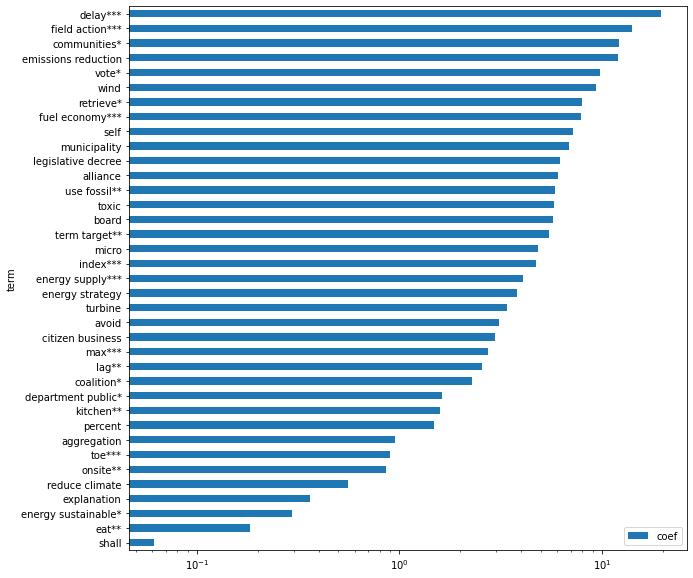

In [26]:
fit_logcv(X_inp, kwds, X_inpcounts, inp_data['AGGRESSIVE_TARGET'], out_file=os.path.join('paper_outputs','econwide_2grams_regression'), 
         Cs=np.linspace(1, 7, 7))

In [ ]:
import os

terms = pd.read_csv(os.path.join('paper_outputs/econwide_2grams_regression_significnt_terms.csv'))
terms

In [ ]:
X_inp.T[[3,4]].shape

In [17]:
l = terms['term'].apply(lambda t: cv_2grams.vocabulary_[t]).tolist()

NameError: name 'terms' is not defined

In [18]:
terms = pd.read_csv('/Users/siddharthsachdeva/personal/carbon_zero_nlp/net_zero/data/Sidd/paper_outputs/econwide_2grams_regression_significnt_terms.csv')
terms

,term,idx,pval,coef
0,class,1139,0.692,0.202226
1,lag,4119,0.000,0.399621
2,fee,2967,0.000,0.762496
3,energy plan,2590,0.000,1.052474
4,square,6873,0.000,1.812452
5,boiler,725,0.000,1.946932
6,emission generate,2364,0.000,2.201548
7,path,5171,0.000,2.495335
8,climate protection,1175,0.000,2.795187
9,advocate,274,0.000,3.836562


In [20]:
from sklearn.manifold import MDS
from sklearn.cluster import AgglomerativeClustering

corr = pd.DataFrame(x_2g.T[l].toarray()).T.corr()
corr = - corr
corr.columns = terms['term'].tolist()
corr.index = terms['term'].tolist()

mds = KMeans(n_clusters=4)
out = mds.fit_predict(corr)
terms['cluster'] = out
terms.sort_values('cluster')

NameError: name 'l' is not defined

In [ ]:
s = {
    'Talking specifics': [
        'Opportunity reduce',
        'Percent',
        'Year use',
        'Square',
        'Ghg reduction',
        'emissions generate',
        'Life cycle'
    ],
    'Emissions Reduction Sources': [
        'Wood',
        'Chp (combined heat and power)',
        'Passive',
        'Boiler'
    ],
    'Governance': [
        'Mayor',
        'Fees',
        'energy plan'
    ],
    'Human-centered': [
        'Inclusive',
        'Advocate'
    ]
}

In [ ]:
mds = MDS(dissimilarity='precomputed', metric=False)
out = pd.DataFrame(mds.fit_transform(corr))
print(list(out[:, 0]))
# terms['x'] = list(out[:, 0])
# terms['y'] = out[:, 1]
# terms.plot.scatter(x='x', y='y', c='cluster')

In [ ]:
leg_normx2 = normalized_x2g[inp_data.legislative_commitment.notnull(),:]
leg_x2 = x_2g[inp_data.legislative_commitment.notnull(),:]
X_inp, kws, X_inpcounts = remove_terms(cv_2grams, ignore_terms, leg_normx2, leg_x2)
y = inp_data[inp_data.legislative_commitment.notnull()].legislative_commitment.apply(int)
print(y.value_counts(dropna=False))

fit_logcv(X_inp, kws, X_inpcounts, y, out_file='legisl8v_2grams_regression.html')

In [ ]:
fit_logcv(normalized_x2g, kws, x_2g, inp_data.legislative_commitment, out_file='legisl8v_2grams_regression.html')

In [ ]:
kws = [term for term, _ in sorted(cv.vocabulary_.items(), key= lambda p: p[1])]

fit_logcv(normalized_x, kws, x, inp_data['HAS_TARGET'], out_file='significant_1grams_regression.html')

In [ ]:
leg_norm_x2g = normalized_x2g[inp_data['HAS_TARGET']]
leg_x2g = x_2g[inp_data['HAS_TARGET']]
leg_tgt = inp_data[inp_data['HAS_TARGET']]['legislative_commitment'].apply(bool)
kws = [term for term, _ in sorted(cv_2grams.vocabulary_.items(), key= lambda p: p[1])]
fit_logcv(leg_norm_x2g, kws, leg_x2g, leg_tgt, 
          Cs=np.linspace(1, 8, 5), out_file='significant_2grams_regression_legislative.html')

In [ ]:
from sklearn.utils.multiclass import check_classification_targets

check_classification_targets(leg_tgt.apply(bool))

In [ ]:
inp_data['HAS_TARGET']